In [34]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [2]:
import kagglehub
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
print("Path to dataset files:", path)
file_path = os.path.join(path, "diabetes.csv")
df = pd.read_csv(file_path)

Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [4]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


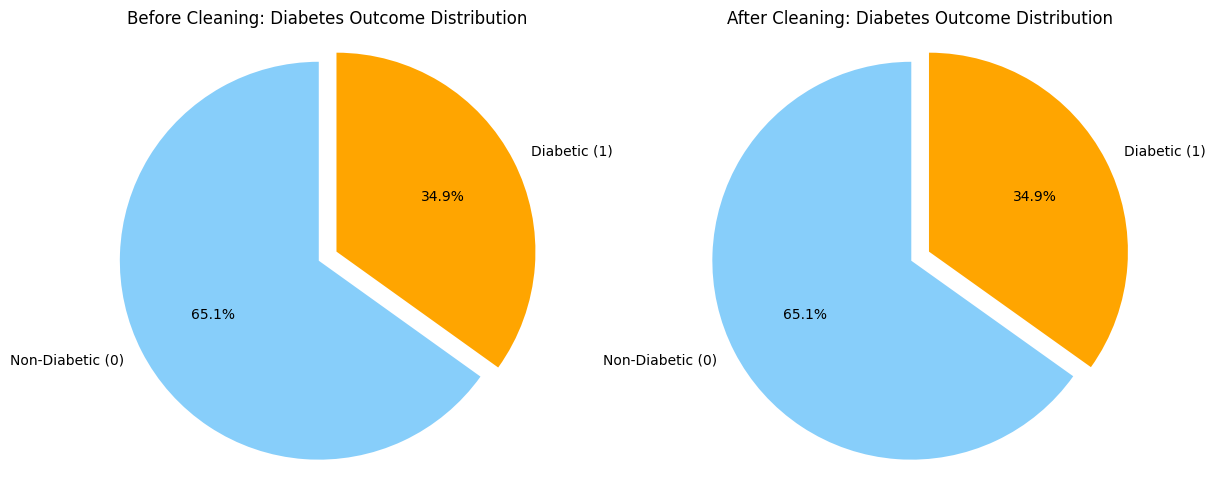

In [14]:
#Pie chart before and after cleaning
colors = ['lightskyblue', 'orange']
# Pie chart before cleaning
outcome_counts_before = df['Outcome'].value_counts()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pie(
    outcome_counts_before,
    labels=['Non-Diabetic (0)', 'Diabetic (1)'],
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.1))
plt.title('Before Cleaning: Diabetes Outcome Distribution')
plt.axis('equal')

#Cleaning
df_cleaned = df[df['Glucose'] > 0]

# Pie chart after cleaning
outcome_counts_after = df_cleaned['Outcome'].value_counts()
plt.subplot(1,2,2)
plt.pie(
    outcome_counts_after,
    labels=['Non-Diabetic (0)', 'Diabetic (1)'],
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0, 0.1))
plt.title('After Cleaning: Diabetes Outcome Distribution')
plt.axis('equal')

plt.tight_layout()
plt.show()

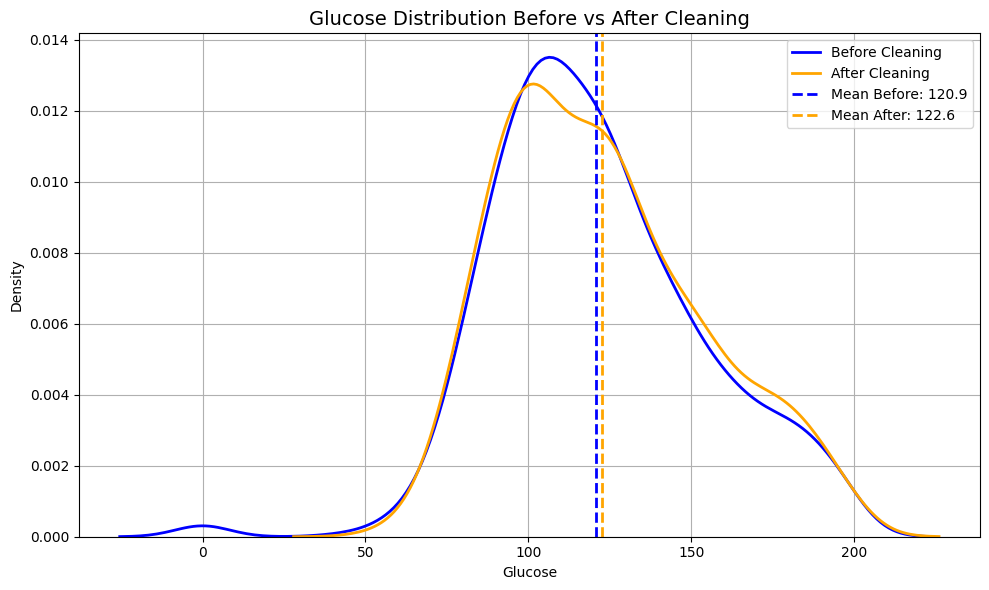

In [51]:
#Distribution
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_dirty = df.copy()
df_clean = df.copy()
df_clean[zero_cols] = df_clean[zero_cols].replace(0, pd.NA)
df_clean = df_clean.dropna()
feature = 'Glucose'

# Calculate means
mean_before = df_dirty[feature].mean()
mean_after = df_clean[feature].mean()

plt.figure(figsize=(10, 6))
sns.kdeplot(df_dirty[feature], label='Before Cleaning', linewidth=2, color='blue')
sns.kdeplot(df_clean[feature], label='After Cleaning', linewidth=2, color='orange')

plt.axvline(mean_before, color='blue', linestyle='--', linewidth=2, label=f'Mean Before: {mean_before:.1f}')
plt.axvline(mean_after, color='orange', linestyle='--', linewidth=2, label=f'Mean After: {mean_after:.1f}')
plt.title(f"{feature} Distribution Before vs After Cleaning", fontsize=14)
plt.xlabel(feature)
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


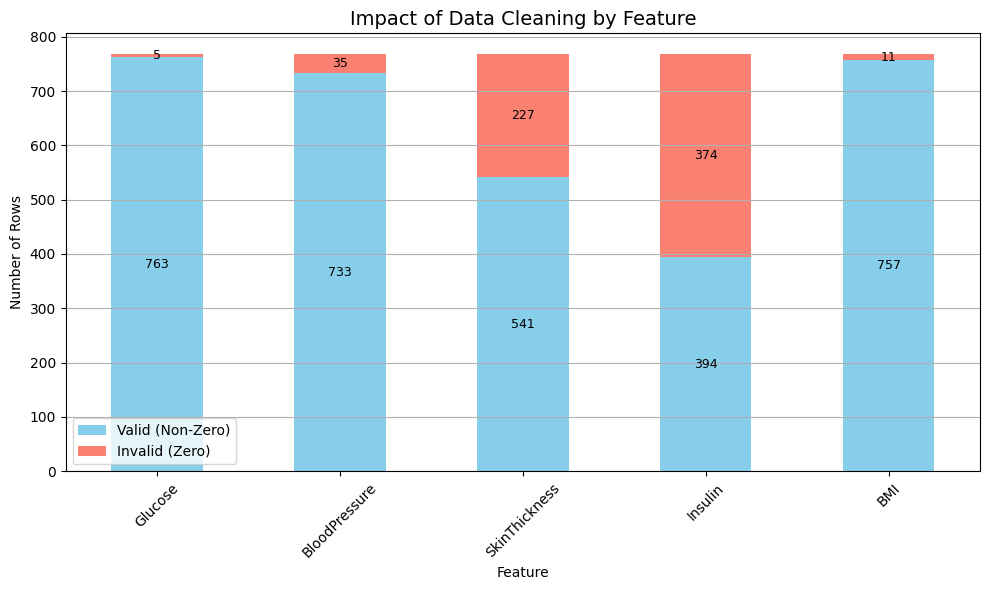

In [52]:
#Cleaning impact before and after cleaning
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_rows = len(df)
clean_counts = []
zero_counts = []

for col in zero_cols:
    zero_count = (df[col] == 0).sum()
    clean_count = total_rows - zero_count
    zero_counts.append(zero_count)
    clean_counts.append(clean_count)

cleaning_summary = pd.DataFrame({
    'Feature': zero_cols,
    'Valid (Non-Zero)': clean_counts,
    'Invalid (Zero)': zero_counts})

ax = cleaning_summary.set_index('Feature')[['Valid (Non-Zero)', 'Invalid (Zero)']].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['skyblue', 'salmon'])

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=9)

plt.title("Impact of Data Cleaning by Feature", fontsize=14)
plt.ylabel("Number of Rows")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

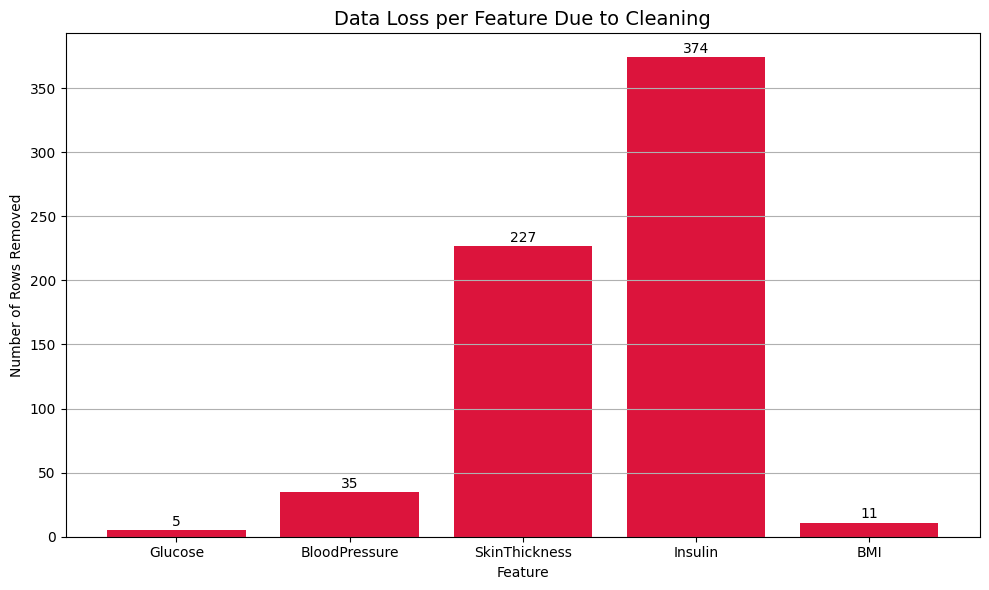

In [48]:
#Cleaning chages
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_rows = len(df)
data_loss = {col: (df[col] == 0).sum() for col in zero_cols}
loss_df = pd.DataFrame(list(data_loss.items()), columns=['Feature', 'Rows Removed'])

plt.figure(figsize=(10, 6))
bars = plt.bar(loss_df['Feature'], loss_df['Rows Removed'], color='crimson')
plt.title("Data Loss per Feature Due to Cleaning", fontsize=14)
plt.xlabel("Feature")
plt.ylabel("Number of Rows Removed")
plt.grid(axis='y')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)
plt.tight_layout()
plt.show()


Shape before cleaning: (768, 9)
Shape after cleaning: (763, 9)


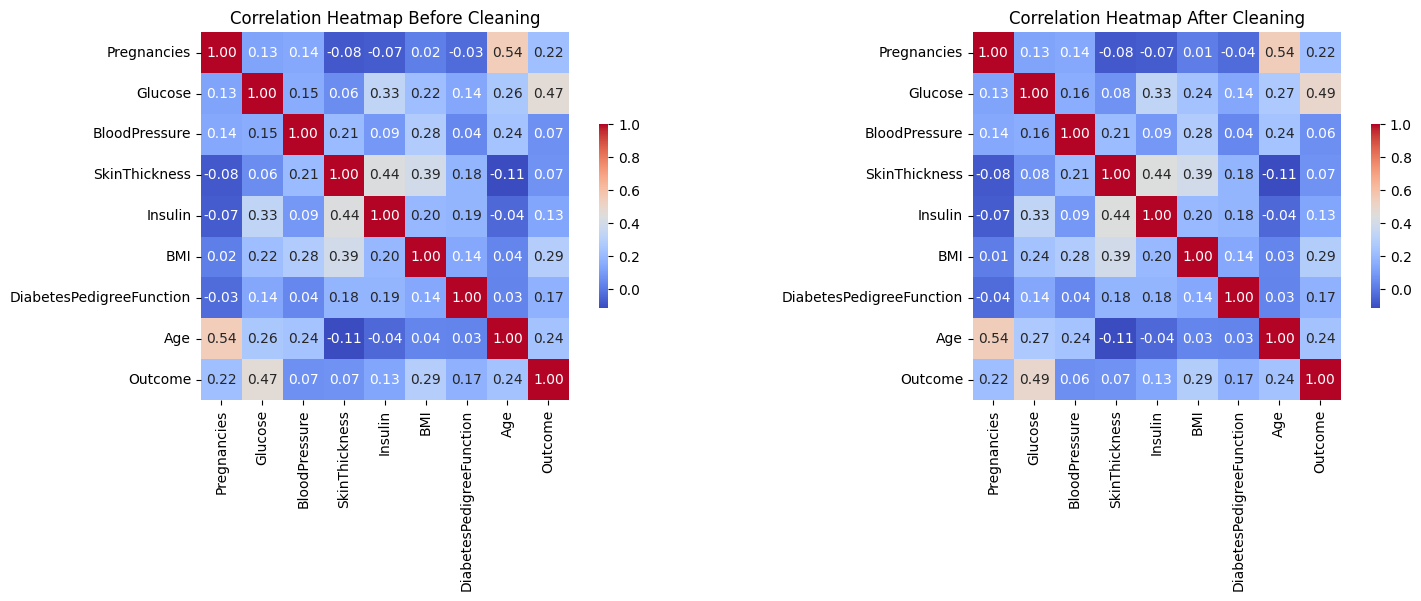

In [53]:
#Correlation Heatmap before and after cleaning
#before cleaning
print("\nShape before cleaning:", df.shape)

#Cleaning
df_cleaned = df[df['Glucose'] > 0]
print("Shape after cleaning:", df_cleaned.shape)

# Set up the figure
plt.figure(figsize=(16,6))

# Before cleaning
plt.subplot(1,2,1)
corr_before = df.corr()
sns.heatmap(corr_before, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': 0.5})
plt.title('Correlation Heatmap Before Cleaning')

# After cleaning
plt.subplot(1,2,2)
corr_after = df_cleaned.corr()
sns.heatmap(corr_after, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': 0.5})
plt.title('Correlation Heatmap After Cleaning')

plt.tight_layout()
plt.show()

<ipython-input-55-20b10a3b76eb>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Status', y=feature, data=df_compare, palette=custom_palette)
<ipython-input-55-20b10a3b76eb>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Status', y=feature, data=df_compare, palette=custom_palette)
<ipython-input-55-20b10a3b76eb>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Status', y=feature, data=df_compare, palette=custom_palette)


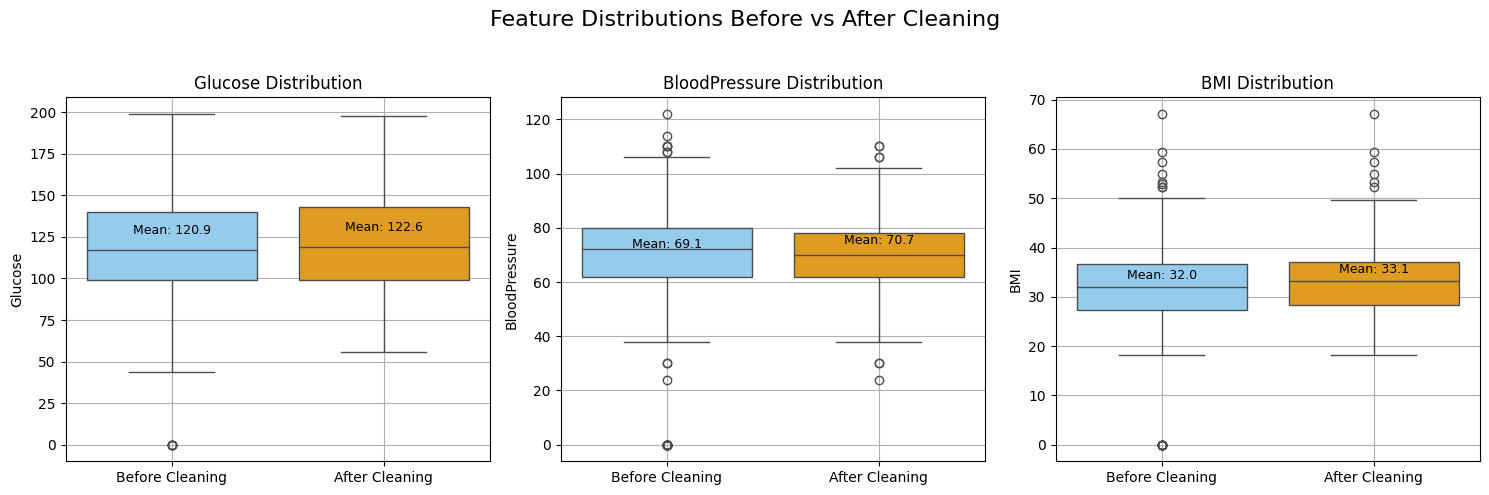

In [55]:
#Boxplot before and after cleaning
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_dirty = df.copy()
df_clean = df.copy()
df_clean[zero_cols] = df_clean[zero_cols].replace(0, pd.NA)
df_clean = df_clean.dropna()
df_dirty['Status'] = 'Before Cleaning'
df_clean['Status'] = 'After Cleaning'
df_compare = pd.concat([df_dirty, df_clean])
features_to_plot = ['Glucose', 'BloodPressure', 'BMI']
custom_palette = {'Before Cleaning': 'lightskyblue', 'After Cleaning': 'orange'}

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    ax = sns.boxplot(x='Status', y=feature, data=df_compare, palette=custom_palette)
    means = df_compare.groupby('Status')[feature].mean()
    for j, status in enumerate(['Before Cleaning', 'After Cleaning']):
        mean_val = means[status]
        plt.text(
            j,
            mean_val + (0.05 * mean_val),
            f"Mean: {mean_val:.1f}",
            ha='center',
            fontsize=9,
            color='black')
    plt.title(f"{feature} Distribution", fontsize=12)
    plt.xlabel('')
    plt.grid(True)
plt.suptitle("Feature Distributions Before vs After Cleaning", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

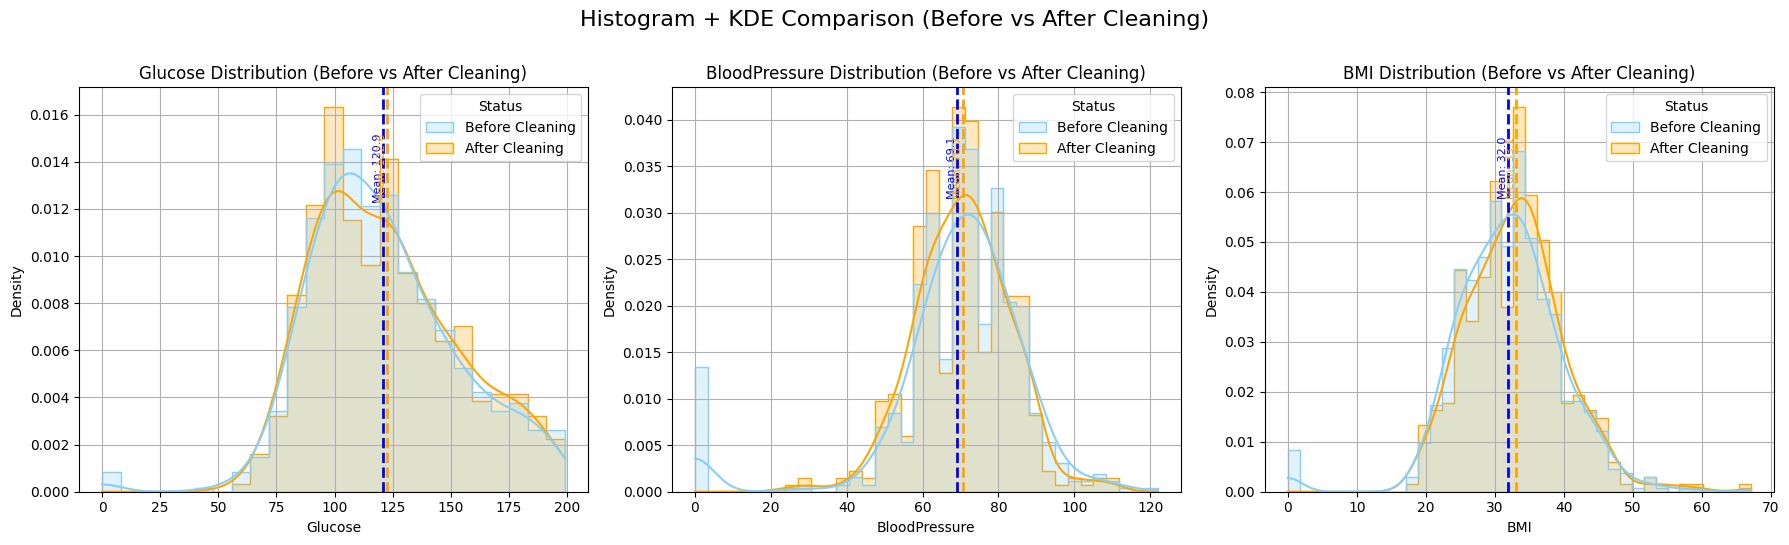

In [57]:
#Histogram before and after cleaning
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_dirty = df.copy()
df_clean = df.copy()
df_clean[zero_cols] = df_clean[zero_cols].replace(0, pd.NA)
df_clean = df_clean.dropna()
df_dirty['Status'] = 'Before Cleaning'
df_clean['Status'] = 'After Cleaning'
df_compare = pd.concat([df_dirty, df_clean])
features_to_plot = ['Glucose', 'BloodPressure', 'BMI']

plt.figure(figsize=(18, 5))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df_compare, x=feature, hue='Status', kde=True, element='step', stat='density', common_norm=False, palette={'Before Cleaning': 'lightskyblue', 'After Cleaning': 'orange'})
    means = df_compare.groupby('Status')[feature].mean()

    for status, color in zip(['Before Cleaning', 'After Cleaning'], ['blue', 'orange']):
        mean_val = means[status]
        plt.axvline(mean_val, color=color, linestyle='--', linewidth=2)
        plt.text(
            mean_val,
            plt.gca().get_ylim()[1]*0.8,
            f"Mean: {mean_val:.1f}",
            color=color,
            rotation=90,
            va='center',
            ha='right',
            fontsize=8)
    plt.title(f"{feature} Distribution (Before vs After Cleaning)", fontsize=12)
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Histogram + KDE Comparison (Before vs After Cleaning)", fontsize=16, y=1.08)
plt.show()


<ipython-input-58-ef12b54515e3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-58-ef12b54515e3>:16: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
<ipython-input-58-ef12b54515e3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
<ipython-input-58-ef12b54515e3>:16: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
<ipython-input-58-ef12b54515e3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Ass

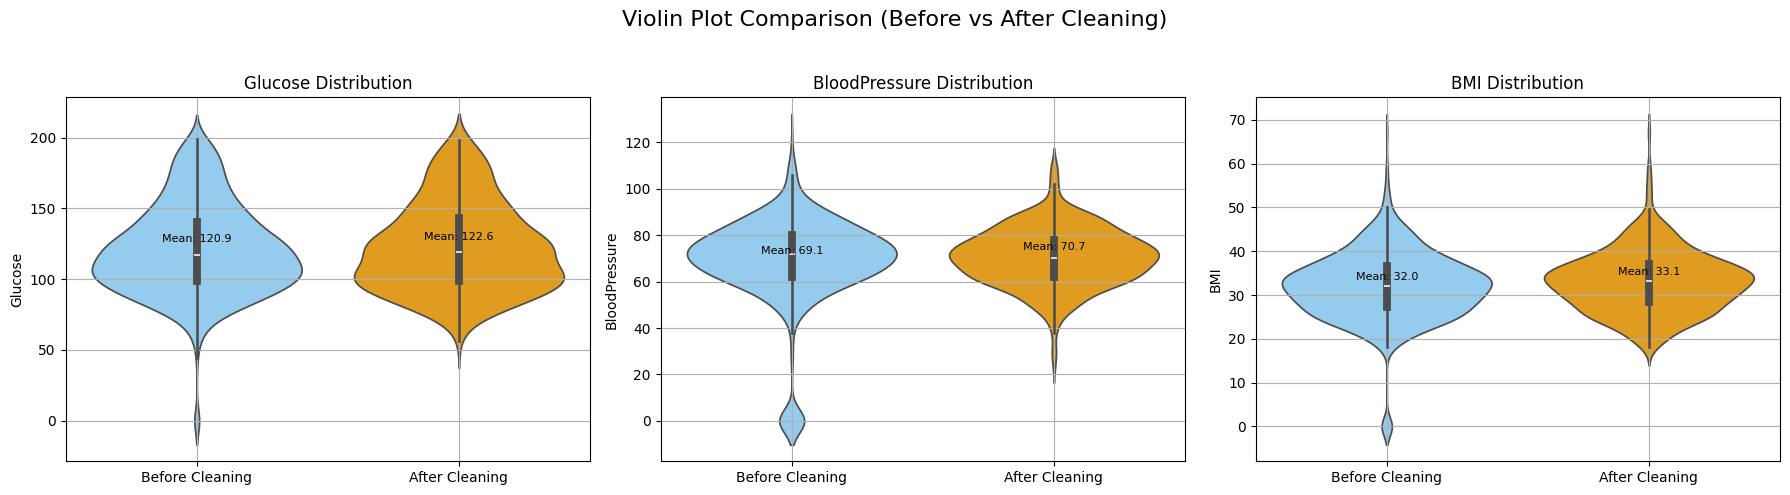

In [58]:
#Density before and after cleaning
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_dirty = df.copy()
df_clean = df.copy()
df_clean[zero_cols] = df_clean[zero_cols].replace(0, pd.NA)
df_clean = df_clean.dropna()
df_dirty['Status'] = 'Before Cleaning'
df_clean['Status'] = 'After Cleaning'
df_compare = pd.concat([df_dirty, df_clean])
features_to_plot = ['Glucose', 'BloodPressure', 'BMI']
custom_palette = {'Before Cleaning': 'lightskyblue', 'After Cleaning': 'orange'}

plt.figure(figsize=(18, 5))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(
        x='Status',
        y=feature,
        data=df_compare,
        inner='box',
        scale='width',
        palette=custom_palette)

    means = df_compare.groupby('Status')[feature].mean()

    for j, status in enumerate(['Before Cleaning', 'After Cleaning']):
        mean_val = means[status]
        plt.text(
            j,
            mean_val + (0.03 * mean_val),
            f"Mean: {mean_val:.1f}",
            ha='center',
            va='bottom',
            fontsize=8,
            color='black')
    plt.title(f"{feature} Distribution", fontsize=12)
    plt.xlabel('')
    plt.grid(True)

plt.suptitle("Violin Plot Comparison (Before vs After Cleaning)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

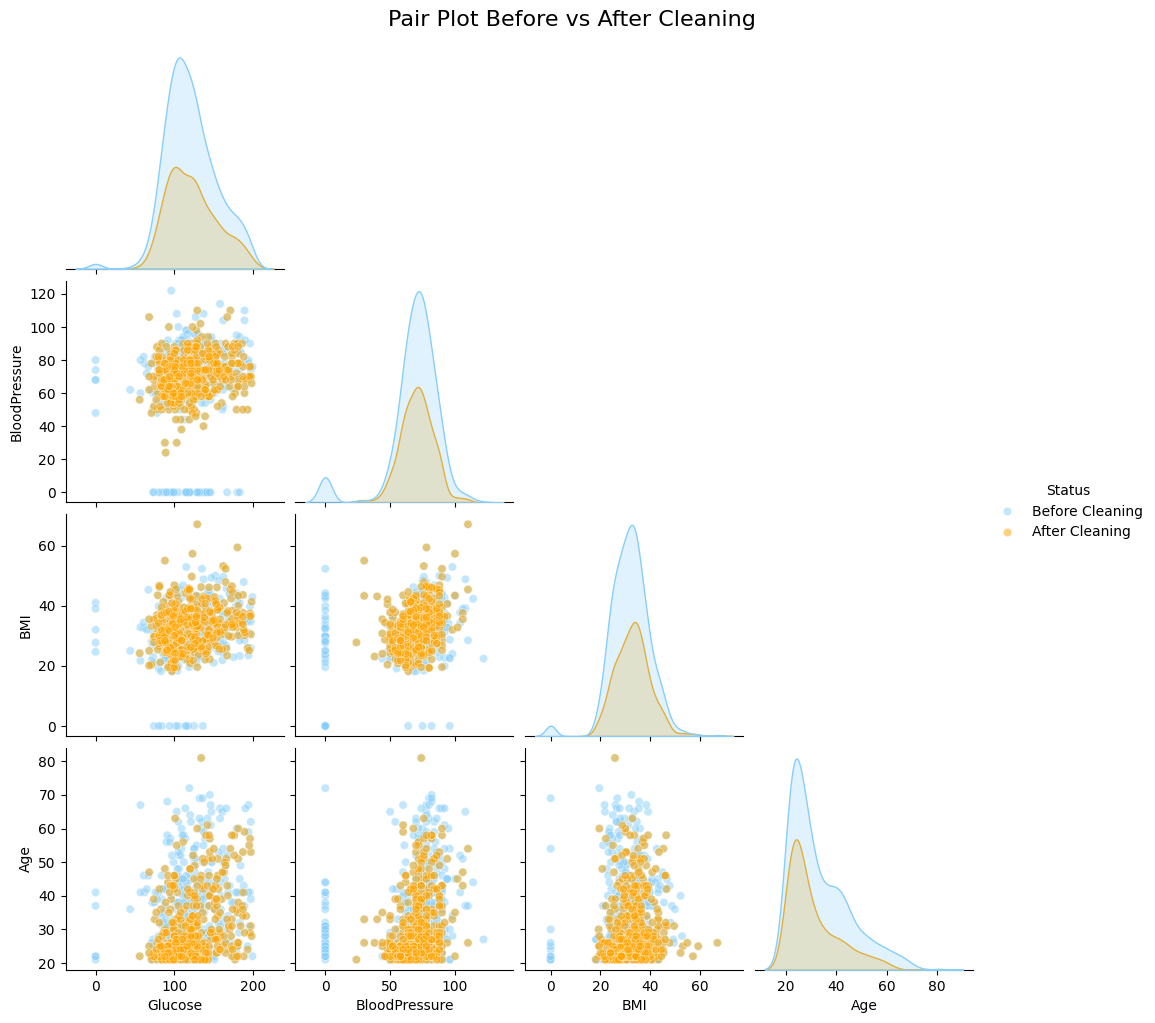


=== Mean Values Before vs After Cleaning ===


,Glucose,BloodPressure,BMI,Age
Status,,,,
After Cleaning,122.627551,70.663265,33.086224,30.9
Before Cleaning,120.894531,69.105469,31.992578,33.2


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Glucose').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('BloodPressure').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('BMI').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Age']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Age'}, axis=1)
              .sort_values('Age', ascending=True))
  xs = counted['Age']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Age', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Status')):
  _plot_series(series, series_name, i)
  fig.legend(title='Status', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Age')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Age']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Age'}, axis=1)
              .sort_values('Age', ascending=True))
  xs = counted['Age']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Age', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Glucose')):
  _plot_series(series, series_name, i)
  fig.legend(title='Glucose', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Age')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Age']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Age'}, axis=1)
              .sort_values('Age', ascending=True))
  xs = counted['Age']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Age', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('BloodPressure')):
  _plot_series(series, series_name, i)
  fig.legend(title='BloodPressure', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Age')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Age']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Age'}, axis=1)
              .sort_values('Age', ascending=True))
  xs = counted['Age']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Age', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('BMI')):
  _plot_series(series, series_name, i)
  fig.legend(title='BMI', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Age')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Glucose'].value_counts()
    for x_label, grp in _df_10.groupby('Status')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Status')
_ = plt.ylabel('Glucose')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['BloodPressure'].value_counts()
    for x_label, grp in _df_11.groupby('Glucose')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Glucose')
_ = plt.ylabel('BloodPressure')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['BMI'].value_counts()
    for x_label, grp in _df_12.groupby('BloodPressure')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('BloodPressure')
_ = plt.ylabel('BMI')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Status'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Age', y='Status', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Glucose'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Age', y='Glucose', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['BloodPressure'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Age', y='BloodPressure', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['BMI'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Age', y='BMI', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [59]:
#Pairplot before and after cleaning
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_dirty = df.copy()
df_clean = df.copy()
df_clean[zero_cols] = df_clean[zero_cols].replace(0, pd.NA)
df_clean = df_clean.dropna()
df_dirty['Status'] = 'Before Cleaning'
df_clean['Status'] = 'After Cleaning'
df_compare = pd.concat([df_dirty, df_clean])
features_subset = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'Status']

g = sns.pairplot(
    df_compare[features_subset],
    hue='Status',
    corner=True,
    plot_kws={'alpha': 0.5},
    palette={'Before Cleaning': 'lightskyblue', 'After Cleaning': 'orange'})
g.fig.suptitle("Pair Plot Before vs After Cleaning", y=1.02, fontsize=16)
plt.show()

mean_summary = df_compare.groupby('Status')[['Glucose', 'BloodPressure', 'BMI', 'Age']].mean().round(1)
print("\n=== Mean Values Before vs After Cleaning ===")
display(mean_summary)


Shape before cleaning: (768, 9)
Shape after cleaning: (763, 9)


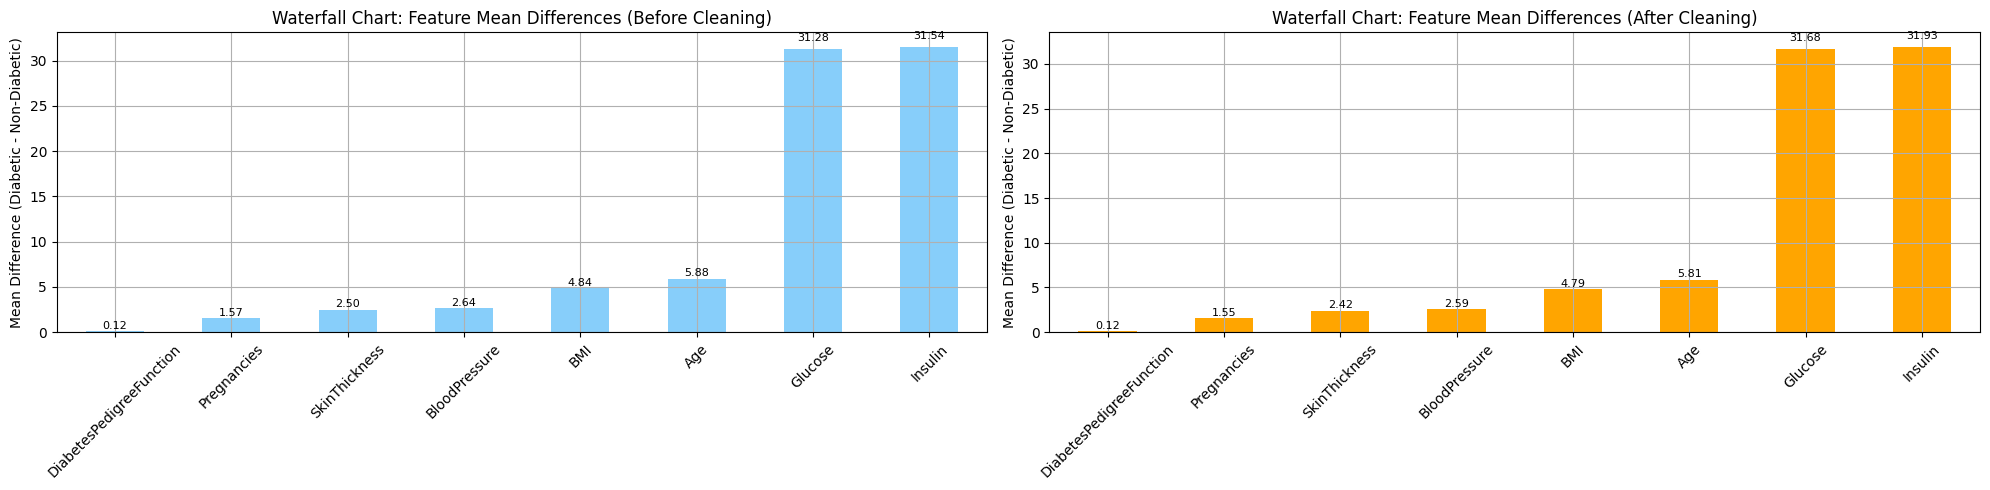

In [62]:
#Waterfall before and after cleaning
#before cleaning
print("\nShape before cleaning:", df.shape)
# Cleaning
df_cleaned = df[df['Glucose'] > 0]
print("Shape after cleaning:", df_cleaned.shape)
plt.figure(figsize=(20,5))

# before cleaning
plt.subplot(1,2,1)
mean_diff_before = df[df['Outcome'] == 1].mean() - df[df['Outcome'] == 0].mean()
mean_diff_before = mean_diff_before.drop('Outcome').sort_values()
ax1 = mean_diff_before.plot(kind='bar', color='lightskyblue')
plt.title('Waterfall Chart: Feature Mean Differences (Before Cleaning)')
plt.ylabel('Mean Difference (Diabetic - Non-Diabetic)')
plt.xticks(rotation=45)
plt.grid(True)
for idx, val in enumerate(mean_diff_before):
    plt.text(
        idx,
        val + (0.02 * val if val >= 0 else -0.02 * val),
        f"{val:.2f}",
        ha='center',
        va='bottom' if val >= 0 else 'top',
        fontsize=8)

# after cleaning
plt.subplot(1,2,2)
mean_diff_after = df_cleaned[df_cleaned['Outcome'] == 1].mean() - df_cleaned[df_cleaned['Outcome'] == 0].mean()
mean_diff_after = mean_diff_after.drop('Outcome').sort_values()
ax2 = mean_diff_after.plot(kind='bar', color='orange')
plt.title('Waterfall Chart: Feature Mean Differences (After Cleaning)')
plt.ylabel('Mean Difference (Diabetic - Non-Diabetic)')
plt.xticks(rotation=45)
plt.grid(True)

for idx, val in enumerate(mean_diff_after):
    plt.text(
        idx,
        val + (0.02 * val if val >= 0 else -0.02 * val),
        f"{val:.2f}",
        ha='center',
        va='bottom' if val >= 0 else 'top',
        fontsize=8)

plt.tight_layout()
plt.show()

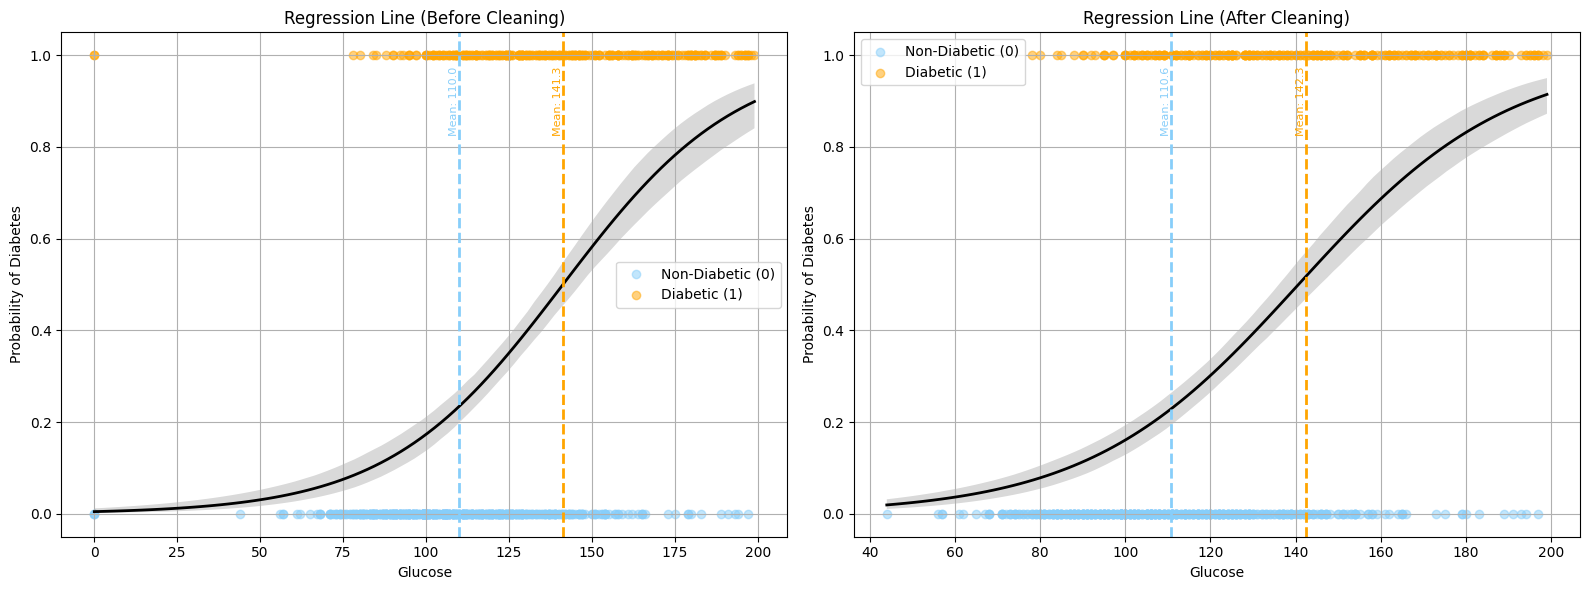

In [65]:
#Logistic Regression line before and after cleaning
df_cleaned = df[df['Glucose'] > 0]
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)

for outcome_value, color, label in zip([0,1], ['lightskyblue', 'orange'], ['Non-Diabetic (0)', 'Diabetic (1)']):
    subset = df[df['Outcome'] == outcome_value]
    plt.scatter(subset['Glucose'], subset['Outcome'], alpha=0.5, label=label, color=color)

sns.regplot(
    data=df,
    x='Glucose',
    y='Outcome',
    logistic=True,
    scatter=False,
    line_kws={'color':'black', 'linewidth':2})

means_before = df.groupby('Outcome')['Glucose'].mean()

for outcome_value, color in zip([0,1], ['lightskyblue', 'orange']):
    mean_val = means_before[outcome_value]
    plt.axvline(mean_val, color=color, linestyle='--', linewidth=2)
    plt.text(
        mean_val,
        0.9,
        f"Mean: {mean_val:.1f}",
        color=color,
        rotation=90,
        verticalalignment='center',
        horizontalalignment='right',
        fontsize=8)

plt.title('Regression Line (Before Cleaning)')
plt.xlabel('Glucose')
plt.ylabel('Probability of Diabetes')
plt.legend()
plt.grid(True)
plt.subplot(1,2,2)

for outcome_value, color, label in zip([0,1], ['lightskyblue', 'orange'], ['Non-Diabetic (0)', 'Diabetic (1)']):
    subset = df_cleaned[df_cleaned['Outcome'] == outcome_value]
    plt.scatter(subset['Glucose'], subset['Outcome'], alpha=0.5, label=label, color=color)
sns.regplot(
    data=df_cleaned,
    x='Glucose',
    y='Outcome',
    logistic=True,
    scatter=False,
    line_kws={'color':'black', 'linewidth':2})
means_after = df_cleaned.groupby('Outcome')['Glucose'].mean()

for outcome_value, color in zip([0,1], ['lightskyblue', 'orange']):
    mean_val = means_after[outcome_value]
    plt.axvline(mean_val, color=color, linestyle='--', linewidth=2)
    plt.text(
        mean_val,
        0.9,
        f"Mean: {mean_val:.1f}",
        color=color,
        rotation=90,
        verticalalignment='center',
        horizontalalignment='right',
        fontsize=8)

plt.title('Regression Line (After Cleaning)')
plt.xlabel('Glucose')
plt.ylabel('Probability of Diabetes')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


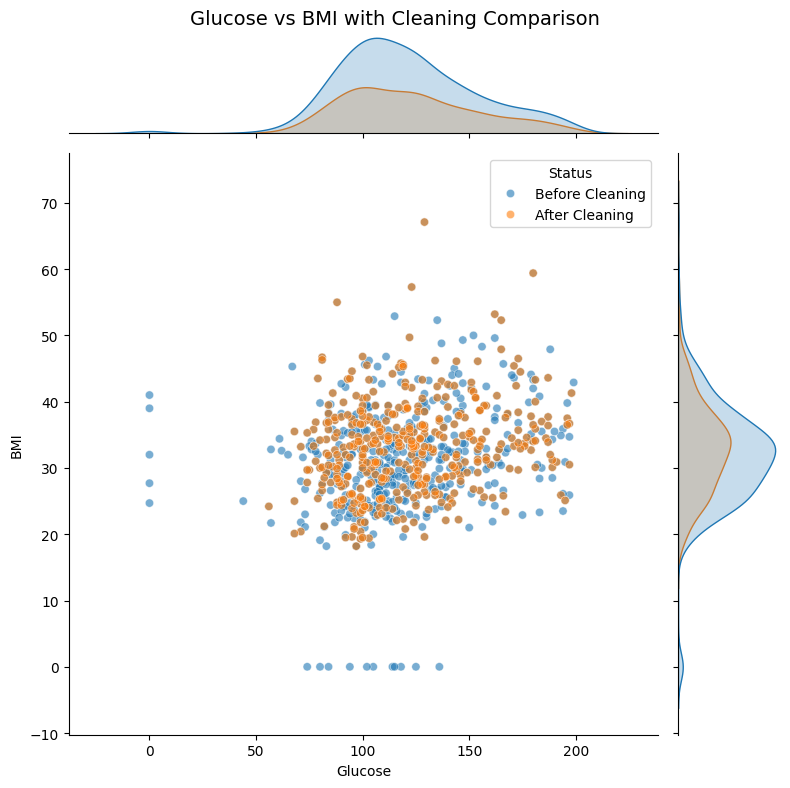

In [67]:
#Comparision before and after cleaning
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_dirty = df.copy()
df_clean = df.copy()
df_clean[zero_cols] = df_clean[zero_cols].replace(0, pd.NA)
df_clean = df_clean.dropna()
df_dirty['Status'] = 'Before Cleaning'
df_clean['Status'] = 'After Cleaning'
df_compare = pd.concat([df_dirty, df_clean])
x_feature = 'Glucose'
y_feature = 'BMI'

g = sns.jointplot(
    data=df_compare,
    x=x_feature,
    y=y_feature,
    hue="Status",
    kind="scatter",
    height=8,
    alpha=0.6)
g.fig.suptitle(f"{x_feature} vs {y_feature} with Cleaning Comparison", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


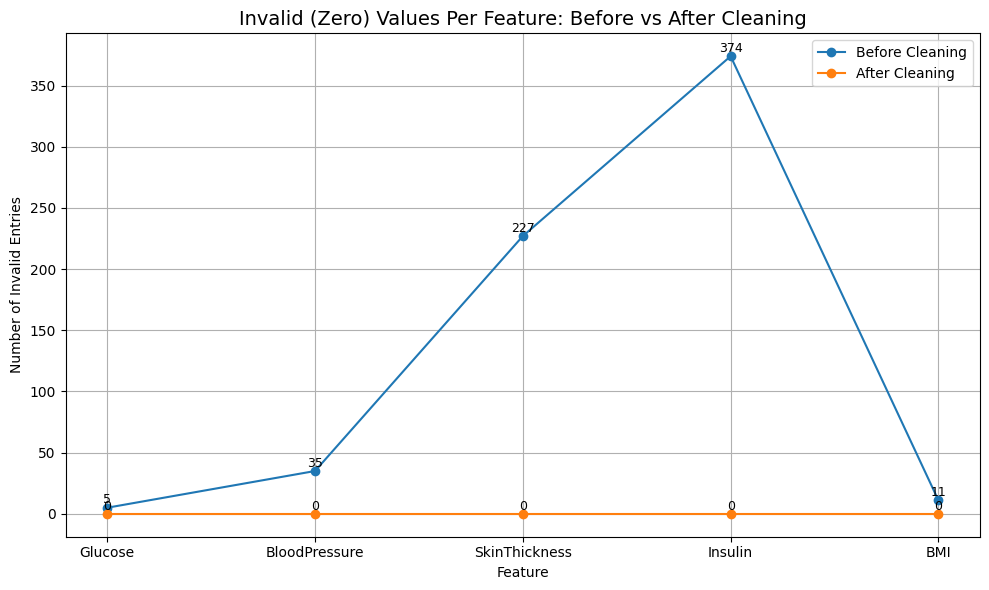

In [69]:
#Line Graph before and after cleaning
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zero_counts_before = df[zero_cols].isin([0]).sum()
df_clean = df.copy()
df_clean[zero_cols] = df_clean[zero_cols].replace(0, pd.NA)
df_clean = df_clean.dropna()
zero_counts_after = df_clean[zero_cols].isin([0]).sum()

invalid_summary = pd.DataFrame({
    'Feature': zero_cols,
    'Before Cleaning': zero_counts_before.values,
    'After Cleaning': zero_counts_after.values})

df_long = invalid_summary.melt(
    id_vars='Feature',
    var_name='Stage',
    value_name='Invalid Count')

plt.figure(figsize=(10, 6))
for stage in df_long['Stage'].unique():
    subset = df_long[df_long['Stage'] == stage]
    plt.plot(subset['Feature'], subset['Invalid Count'], marker='o', label=stage)
    for x, y in zip(subset['Feature'], subset['Invalid Count']):
        plt.text(x, y + 1, str(y), ha='center', va='bottom', fontsize=9, color='black')

plt.title("Invalid (Zero) Values Per Feature: Before vs After Cleaning", fontsize=14)
plt.xlabel("Feature")
plt.ylabel("Number of Invalid Entries")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


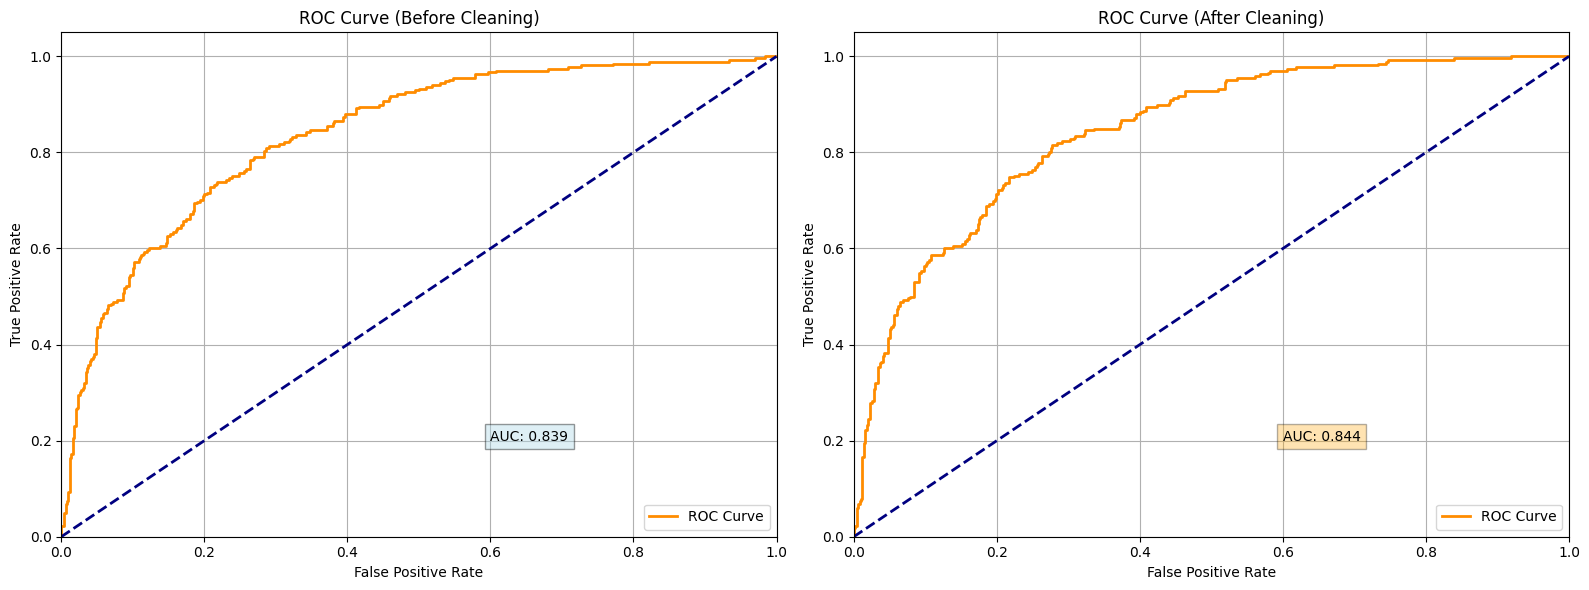

In [70]:
#ROC curve
df_cleaned = df[df['Glucose'] > 0]
X_before = df.drop('Outcome', axis=1)
y_before = df['Outcome']
X_after = df_cleaned.drop('Outcome', axis=1)
y_after = df_cleaned['Outcome']
model_before = LogisticRegression(max_iter=1000)
model_before.fit(X_before, y_before)
y_pred_prob_before = model_before.predict_proba(X_before)[:,1]
model_after = LogisticRegression(max_iter=1000)
model_after.fit(X_after, y_after)
y_pred_prob_after = model_after.predict_proba(X_after)[:,1]

fpr_before, tpr_before, _ = roc_curve(y_before, y_pred_prob_before)
roc_auc_before = roc_auc_score(y_before, y_pred_prob_before)
fpr_after, tpr_after, _ = roc_curve(y_after, y_pred_prob_after)
roc_auc_after = roc_auc_score(y_after, y_pred_prob_after)
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(fpr_before, tpr_before, color='darkorange', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Before Cleaning)')
plt.grid(True)
plt.legend(loc="lower right")
plt.text(0.6, 0.2, f"AUC: {roc_auc_before:.3f}", fontsize=10, color='black', bbox=dict(facecolor='lightblue', alpha=0.4))

plt.subplot(1,2,2)
plt.plot(fpr_after, tpr_after, color='darkorange', lw=2, label='ROC Curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (After Cleaning)')
plt.grid(True)
plt.legend(loc="lower right")
plt.text(0.6, 0.2, f"AUC: {roc_auc_after:.3f}", fontsize=10, color='black', bbox=dict(facecolor='orange', alpha=0.3))

plt.tight_layout()
plt.show()

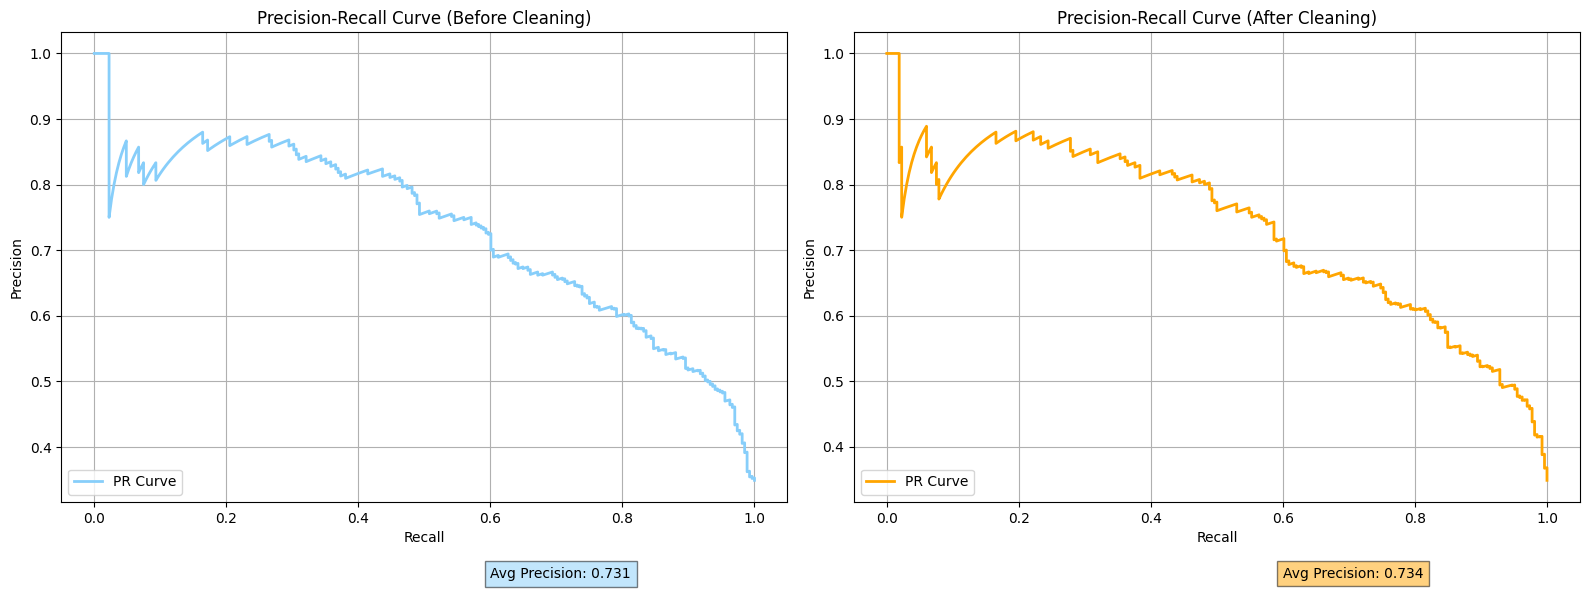

In [72]:
#Precision Recall
df_cleaned = df[df['Glucose'] > 0]
X_before = df.drop('Outcome', axis=1)
y_before = df['Outcome']
X_after = df_cleaned.drop('Outcome', axis=1)
y_after = df_cleaned['Outcome']

model_before = LogisticRegression(max_iter=1000)
model_before.fit(X_before, y_before)
y_pred_prob_before = model_before.predict_proba(X_before)[:,1]
model_after = LogisticRegression(max_iter=1000)
model_after.fit(X_after, y_after)
y_pred_prob_after = model_after.predict_proba(X_after)[:,1]

precision_before, recall_before, _ = precision_recall_curve(y_before, y_pred_prob_before)
avg_precision_before = average_precision_score(y_before, y_pred_prob_before)
precision_after, recall_after, _ = precision_recall_curve(y_after, y_pred_prob_after)
avg_precision_after = average_precision_score(y_after, y_pred_prob_after)
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(recall_before, precision_before, color='lightskyblue', lw=2, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Before Cleaning)')
plt.grid(True)
plt.legend(loc="lower left")
plt.text(0.6, 0.2, f"Avg Precision: {avg_precision_before:.3f}", fontsize=10, color='black', bbox=dict(facecolor='lightskyblue', alpha=0.5))

plt.subplot(1,2,2)
plt.plot(recall_after, precision_after, color='orange', lw=2, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (After Cleaning)')
plt.grid(True)
plt.legend(loc="lower left")
plt.text(0.6, 0.2, f"Avg Precision: {avg_precision_after:.3f}", fontsize=10, color='black', bbox=dict(facecolor='orange', alpha=0.5))

plt.tight_layout()
plt.show()

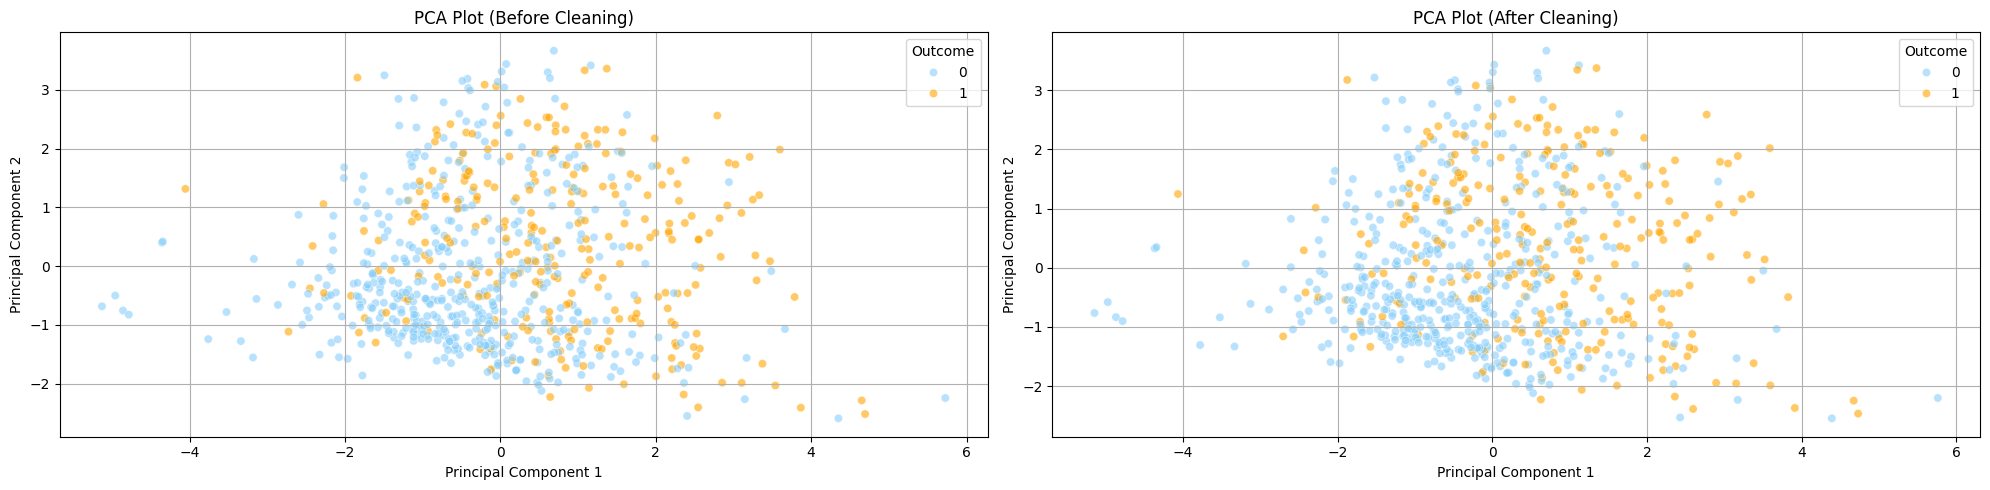

In [74]:
#PCA
df_cleaned = df[df['Glucose'] > 0]
X_before = df.drop('Outcome', axis=1)
y_before = df['Outcome']
X_after = df_cleaned.drop('Outcome', axis=1)
y_after = df_cleaned['Outcome']
scaler = StandardScaler()
X_before_scaled = scaler.fit_transform(X_before)
X_after_scaled = scaler.fit_transform(X_after)
pca = PCA(n_components=2)
X_pca_before = pca.fit_transform(X_before_scaled)
X_pca_after = pca.fit_transform(X_after_scaled)
df_pca_before = pd.DataFrame(data=X_pca_before, columns=['PC1', 'PC2'])
df_pca_before['Outcome'] = y_before.values
df_pca_after = pd.DataFrame(data=X_pca_after, columns=['PC1', 'PC2'])
df_pca_after['Outcome'] = y_after.values
plt.figure(figsize=(20,5))

# Before Cleaning
plt.subplot(1,2,1)
sns.scatterplot(
    data=df_pca_before,
    x='PC1',
    y='PC2',
    hue='Outcome',
    palette={0: 'lightskyblue', 1: 'orange'},
    alpha=0.6)
plt.title('PCA Plot (Before Cleaning)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Outcome')
plt.grid(True)

# After Cleaning
plt.subplot(1,2,2)
sns.scatterplot(
    data=df_pca_after,
    x='PC1',
    y='PC2',
    hue='Outcome',
    palette={0: 'lightskyblue', 1: 'orange'},
    alpha=0.6)
plt.title('PCA Plot (After Cleaning)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Outcome')
plt.grid(True)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


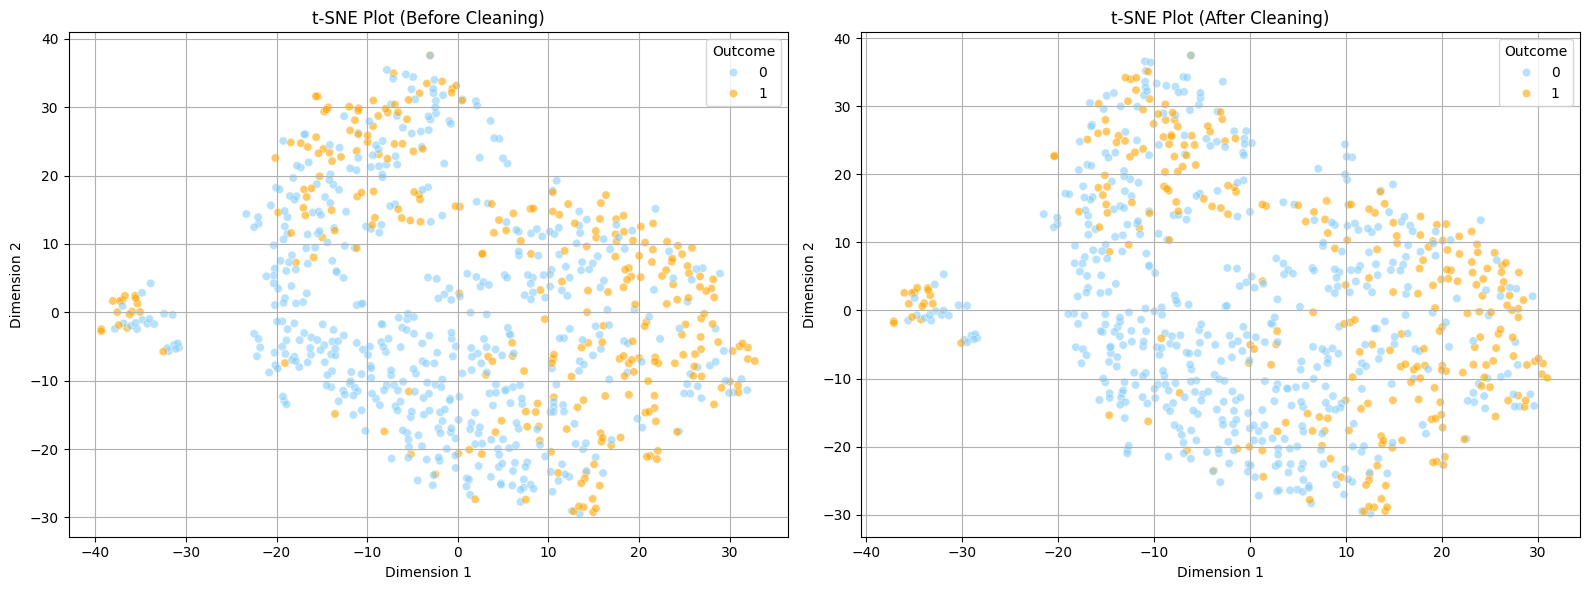

In [32]:
#t-sne
df_cleaned = df[df['Glucose'] > 0]
X_before = df.drop('Outcome', axis=1)
y_before = df['Outcome']
X_after = df_cleaned.drop('Outcome', axis=1)
y_after = df_cleaned['Outcome']
scaler = StandardScaler()
X_before_scaled = scaler.fit_transform(X_before)
X_after_scaled = scaler.fit_transform(X_after)
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
X_tsne_before = tsne.fit_transform(X_before_scaled)
X_tsne_after = tsne.fit_transform(X_after_scaled)
df_tsne_before = pd.DataFrame(data=X_tsne_before, columns=['Dim1', 'Dim2'])
df_tsne_before['Outcome'] = y_before.values
df_tsne_after = pd.DataFrame(data=X_tsne_after, columns=['Dim1', 'Dim2'])
df_tsne_after['Outcome'] = y_after.values
plt.figure(figsize=(16,6))

# Before Cleaning
plt.subplot(1,2,1)
sns.scatterplot(
    data=df_tsne_before,
    x='Dim1',
    y='Dim2',
    hue='Outcome',
    palette={0: 'lightskyblue', 1: 'orange'},
    alpha=0.6)
plt.title('t-SNE Plot (Before Cleaning)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Outcome')
plt.grid(True)

# After Cleaning
plt.subplot(1,2,2)
sns.scatterplot(
    data=df_tsne_after,
    x='Dim1',
    y='Dim2',
    hue='Outcome',
    palette={0: 'lightskyblue', 1: 'orange'},
    alpha=0.6)
plt.title('t-SNE Plot (After Cleaning)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(title='Outcome')
plt.grid(True)

plt.tight_layout()
plt.show()

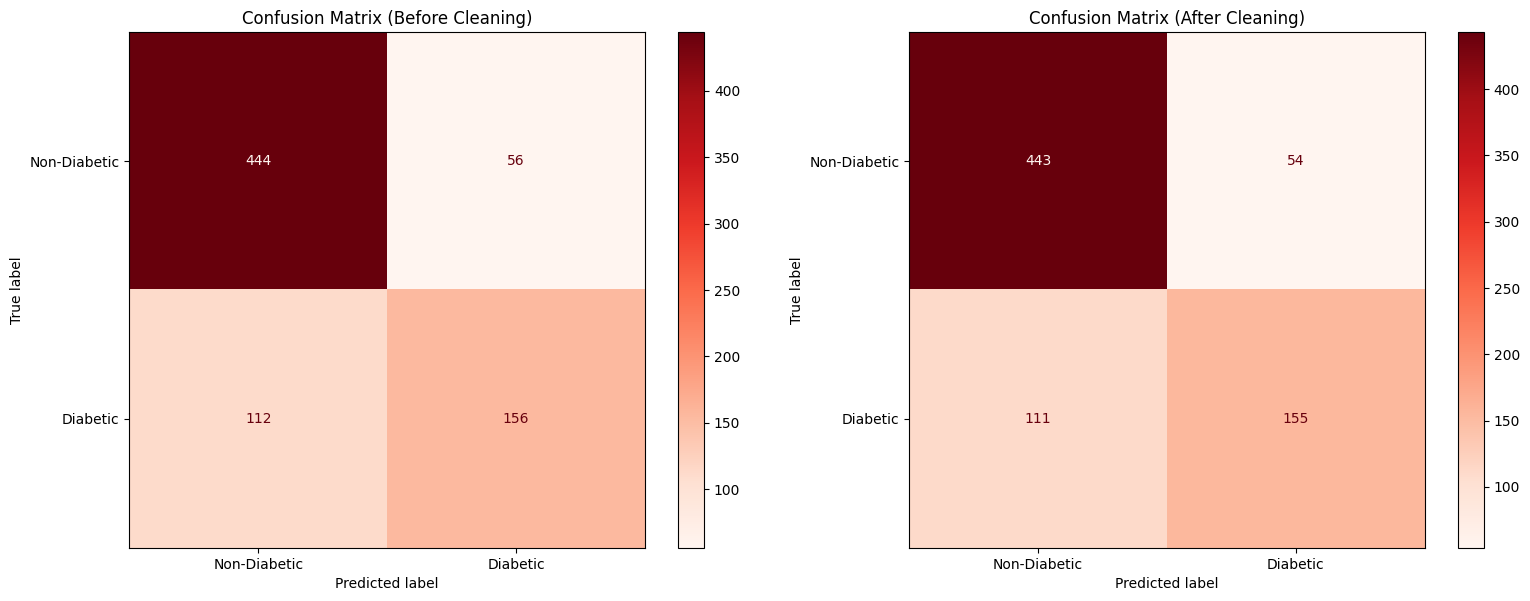

In [75]:
#Confusion Matrix
df_cleaned = df[df['Glucose'] > 0]
X_before = df.drop('Outcome', axis=1)
y_before = df['Outcome']
X_after = df_cleaned.drop('Outcome', axis=1)
y_after = df_cleaned['Outcome']

# Before Cleaning
model_before = LogisticRegression(max_iter=1000)
model_before.fit(X_before, y_before)
y_pred_before = model_before.predict(X_before)

# After Cleaning
model_after = LogisticRegression(max_iter=1000)
model_after.fit(X_after, y_after)
y_pred_after = model_after.predict(X_after)
cm_before = confusion_matrix(y_before, y_pred_before)
cm_after = confusion_matrix(y_after, y_pred_after)
plt.figure(figsize=(16,6))

# Before Cleaning
plt.subplot(1,2,1)
disp_before = ConfusionMatrixDisplay(confusion_matrix=cm_before, display_labels=['Non-Diabetic', 'Diabetic'])
disp_before.plot(cmap='Reds', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix (Before Cleaning)')
plt.subplot(1,2,2)
disp_after = ConfusionMatrixDisplay(confusion_matrix=cm_after, display_labels=['Non-Diabetic', 'Diabetic'])
disp_after.plot(cmap='Reds', values_format='d', ax=plt.gca())
plt.title('Confusion Matrix (After Cleaning)')
plt.tight_layout()
plt.show()